## Text line detection using pero-ocr


## Installation

- Get develop branch and pretrained model

In [ ]:
!rm -r pero-ocr
!git clone --single-branch --branch develop https://github.com/DCGM/pero-ocr

In [ ]:
!wget https://www.fit.vut.cz/~ihradis/pero/pero_eu_cz_print_newspapers_2020-07-28.tar.gz
!tar -xvzf pero_eu_cz_print_newspapers_2020-07-28.tar.gz

- pero-ocr does not work with tensorflow > 2, install a lower version of tensorflow

In [ ]:
!pip install tensorflow==1.15

- install pero-ocr

In [ ]:
%cd pero-ocr
!pip install .
%cd ..

## Find sentence lines in images

- load pretrained model from pero

In [63]:
import os
import cv2
import numpy as np
from pero_ocr.document_ocr import layout
from pero_ocr.line_engine import EngineLineDetectorCNN
from pero_ocr.document_ocr import layout
from pero_ocr.document_ocr.layout import PageLayout, RegionLayout
print(os.getcwd())
print(os.listdir())
print(os.listdir('pero_eu_cz_print_newspapers_2020-07-28'))
engine = EngineLineDetectorCNN('pero_eu_cz_print_newspapers_2020-07-28/ParseNet_exported')

/content
['.config', 'pero_eu_cz_print_newspapers_2020-07-28.tar.gz', 'RABrugge_TBO119_693_088.jpg', 'pero-ocr', 'test_alto.xml', 'pero_eu_cz_print_newspapers_2020-07-28', 'sample_data']
['ParseNet_exported.data-00000-of-00001', 'ocr_engine.json', 'ParseNet_exported.index', 'checkpoint_400000.pth', 'ParseNet_exported.meta', 'config.ini']
INFO:tensorflow:Restoring parameters from pero_eu_cz_print_newspapers_2020-07-28/ParseNet_exported


- Read the image, display it

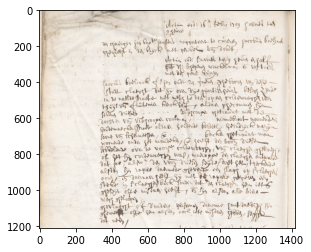

In [67]:
from urllib.request import urlopen
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    # download the image, convert it to a NumPy array, and then read it into OpenCV format
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype = "uint8")
    image = cv2.imdecode(image, readFlag)
    return image

image = url_to_image('https://raw.githubusercontent.com/DIGI-VUB/image.binarization/master/inst/extdata/doxa-example.png')
image = cv2.imread("/content/RABrugge_TBO119_693_088.jpg")
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

- set up the region where to find the sentence lines (full image) 
- extract the lines - we appartenly have here 8 text lines

In [68]:
h, w, c = image.shape
print(h, w, c)
area = np.asarray([
    [0, 0],
    [w, 0],
    [w, h],
    [0, h]
])
baselines, heights, textlines = engine.detect_lines(image)
len(textlines)

1208 1417 3


33

- Create the lines and put them in an image to display

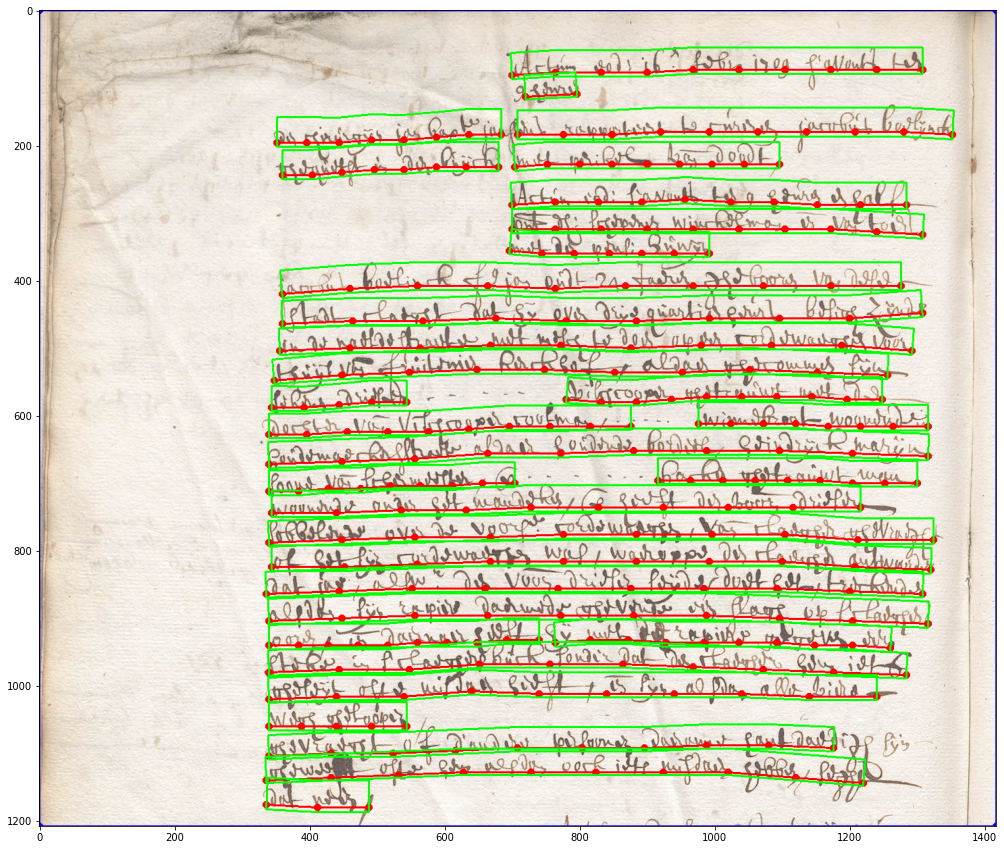

In [71]:
test_polygon = layout.RegionLayout(id = 'r1', polygon = area)
test_layout  = layout.PageLayout(id = 'test', page_size = (h, w))
for baseline, height, textline in zip(baselines, heights, textlines):
    new_textline = layout.TextLine(baseline = baseline, heights = height, polygon = textline)
    test_polygon.lines.append(new_textline)

test_layout.regions.append(test_polygon)
test_layout.to_altoxml("test_alto.xml")
img = test_layout.render_to_image(image)
plt.figure(figsize = (30,15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()